In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv("Concrete_Data.csv")

In [3]:
dataset

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
dataset.shape

(1030, 9)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [6]:
dataset.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [ ]:
dataset.columns

In [ ]:
#X= dataset.drop('csMPa', axis=1)
#Y= dataset['csMPa']

In [7]:
def XY(dataset):
    X_col = []
    Y_col = []

    target = "csMPa"

    for col in dataset.columns:
        if col == target:
            Y_col.append(col)
        else:
            X_col.append(col)
    return X_col,Y_col

In [8]:
XY(dataset)

(['cement',
  'slag',
  'flyash',
  'water',
  'superplasticizer',
  'coarseaggregate',
  'fineaggregate',
  'age'],
 ['csMPa'])

In [9]:
Xcol,Ycol=XY(dataset)

In [10]:
Xcol

['cement',
 'slag',
 'flyash',
 'water',
 'superplasticizer',
 'coarseaggregate',
 'fineaggregate',
 'age']

In [11]:
Ycol

['csMPa']

In [12]:
dataset.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [13]:
descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25","Q2:50","Q3:75","99%","Q4:100","IQR","1.5rule","Lesser","Greater","Min","Max"],
                         columns=Xcol)
for col in Xcol:
    col_desc = dataset[col].describe()
    mode_val = dataset[col].mode()
    descriptive.loc["Mean",col]=dataset[col].mean()
    descriptive.loc["Median",col]=dataset[col].median()
    descriptive.loc["Mode",col]=dataset[col].mode()[0] if not mode_val.empty else np.nan
    descriptive.loc["Q1:25",col]=dataset.describe()[col]["25%"]
    descriptive.loc["Q2:50",col]=dataset.describe()[col]["50%"]
    descriptive.loc["Q3:75",col]=dataset.describe()[col]["75%"]
    descriptive.loc["99%",col]=np.percentile(dataset[col],99)
    descriptive.loc["Q4:100",col]=dataset.describe()[col]["max"]
    descriptive.loc["IQR",col]=descriptive.loc["Q3:75",col]-descriptive.loc["Q1:25",col]
    descriptive.loc["1.5rule",col]=1.5*descriptive.loc["IQR",col]
    descriptive.loc["Lesser",col]=descriptive.loc["Q1:25",col]-descriptive.loc["1.5rule",col]
    descriptive.loc["Greater",col]=descriptive.loc["Q3:75",col]+descriptive.loc["1.5rule",col]
    descriptive.loc["Min",col]=dataset[col].min()
    descriptive.loc["Max",col]=dataset[col].max()


In [14]:
descriptive

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
Mean,281.167864,73.895825,54.18835,181.567282,6.20466,972.918932,773.580485,45.662136
Median,272.9,22.0,0.0,185.0,6.4,968.0,779.5,28.0
Mode,362.6,0.0,0.0,192.0,0.0,932.0,594.0,28
Q1:25,192.375,0.0,0.0,164.9,0.0,932.0,730.95,7.0
Q2:50,272.9,22.0,0.0,185.0,6.4,968.0,779.5,28.0
Q3:75,350.0,142.95,118.3,192.0,10.2,1029.4,824.0,56.0
99%,531.3,290.2,185.213,228.0,23.4,1125.0,943.1,365.0
Q4:100,540.0,359.4,200.1,247.0,32.2,1145.0,992.6,365.0
IQR,157.625,142.95,118.3,27.1,10.2,97.4,93.05,49.0
1.5rule,236.4375,214.425,177.45,40.65,15.3,146.1,139.575,73.5


# Finding outliers

In [15]:
Lesser=[]
Greater=[]
for col in Xcol:
    if(descriptive[col]["Min"]<descriptive[col]["Lesser"]):
        Lesser.append(col)
    if(descriptive[col]["Max"]>descriptive[col]["Greater"]):
        Greater.append(col)

In [16]:
def Foutlier(Lesser,Greater):
    Lesser=[]
    Greater=[]
    for col in Xcol :
        if(descriptive[col]["Min"]<descriptive[col]["Lesser"]):
            Lesser.append(col)
        if(descriptive[col]["Max"]>descriptive[col]["Greater"]):
            Greater.append(col)
    return Lesser,Greater

In [17]:
Foutlier(Lesser,Greater)

(['water'], ['slag', 'water', 'superplasticizer', 'fineaggregate', 'age'])

In [18]:
for col in Lesser:
    dataset.loc[dataset[col] < descriptive.loc["Lesser", col], col] = descriptive.loc["Lesser", col]
for col in Greater:
    dataset.loc[dataset[col] > descriptive.loc["Greater", col], col] = descriptive.loc["Greater", col]

C:\Users\Bagirathan\AppData\Local\Temp\ipykernel_5380\4214239565.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '129.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[dataset[col] > descriptive.loc["Greater", col], col] = descriptive.loc["Greater", col]


In [19]:
descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25","Q2:50","Q3:75","99%","Q4:100","IQR","1.5rule","Lesser","Greater","Min","Max"],
                         columns=Xcol)
for col in Xcol:
    col_desc = dataset[col].describe()
    mode_val = dataset[col].mode()
    descriptive.loc["Mean",col]=dataset[col].mean()
    descriptive.loc["Median",col]=dataset[col].median()
    descriptive.loc["Mode",col]=dataset[col].mode()[0] if not mode_val.empty else np.nan
    descriptive.loc["Q1:25",col]=dataset.describe()[col]["25%"]
    descriptive.loc["Q2:50",col]=dataset.describe()[col]["50%"]
    descriptive.loc["Q3:75",col]=dataset.describe()[col]["75%"]
    descriptive.loc["99%",col]=np.percentile(dataset[col],99)
    descriptive.loc["Q4:100",col]=dataset.describe()[col]["max"]
    descriptive.loc["IQR",col]=descriptive.loc["Q3:75",col]-descriptive.loc["Q1:25",col]
    descriptive.loc["1.5rule",col]=1.5*descriptive.loc["IQR",col]
    descriptive.loc["Lesser",col]=descriptive.loc["Q1:25",col]-descriptive.loc["1.5rule",col]
    descriptive.loc["Greater",col]=descriptive.loc["Q3:75",col]+descriptive.loc["1.5rule",col]
    descriptive.loc["Min",col]=dataset[col].min()
    descriptive.loc["Max",col]=dataset[col].max()

In [20]:
descriptive

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
Mean,281.167864,73.891893,54.18835,181.543252,6.159029,972.918932,773.439587,38.070388
Median,272.9,22.0,0.0,185.0,6.4,968.0,779.5,28.0
Mode,362.6,0.0,0.0,192.0,0.0,932.0,594.0,28.0
Q1:25,192.375,0.0,0.0,164.9,0.0,932.0,730.95,7.0
Q2:50,272.9,22.0,0.0,185.0,6.4,968.0,779.5,28.0
Q3:75,350.0,142.95,118.3,192.0,10.2,1029.4,824.0,56.0
99%,531.3,290.2,185.213,228.0,23.4,1125.0,943.1,129.5
Q4:100,540.0,357.375,200.1,232.65,25.5,1145.0,963.575,129.5
IQR,157.625,142.95,118.3,27.1,10.2,97.4,93.05,49.0
1.5rule,236.4375,214.425,177.45,40.65,15.3,146.1,139.575,73.5


In [21]:
def Routlier(Lesser,Greater):
    Lesser=[]
    Greater=[]
    for col in Xcol:
        if(descriptive[col]["Min"]<descriptive[col]["Lesser"]):
            Lesser.append(col)
        if(descriptive[col]["Max"]>descriptive[col]["Greater"]):
            Greater.append(col)
    return Lesser,Greater

In [22]:
Routlier(Lesser,Greater)

([], [])

# Frequency, Relative Frequence, Cumulative Frequency

In [23]:
def freqTable(col,dataset):
    freqTable=pd.DataFrame(columns=["Unique_Values","Frequency", "Relative_Frequency", "Cumsum"])
    freqTable["Unique_Values"]=dataset[col].value_counts().index
    freqTable["Frequency"]=dataset[col].value_counts().values
    freqTable["Relative_Frequency"]=(freqTable["Frequency"]/103)
    freqTable["Cumsum"]=freqTable["Relative_Frequency"].cumsum()
    return freqTable

In [24]:
freqTable("slag",dataset)

,Unique_Values,Frequency,Relative_Frequency,Cumsum
0,0.0,471,4.572816,4.572816
1,189.0,30,0.291262,4.864078
2,106.3,20,0.194175,5.058252
3,24.0,14,0.135922,5.194175
4,20.0,12,0.116505,5.310680
...,...,...,...,...
180,112.0,1,0.009709,9.961165
181,17.6,1,0.009709,9.970874
182,237.0,1,0.009709,9.980583
183,120.0,1,0.009709,9.990291


# HSK and STD and Variance

In [25]:
descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25","Q2:50","Q3:75","99%","Q4:100","IQR","1.5rule","Lesser","Greater","Min","Max"],
                         columns=Xcol)
for col in Xcol:
    col_desc = dataset[col].describe()
    mode_val = dataset[col].mode()
    descriptive.loc["Mean",col]=dataset[col].mean()
    descriptive.loc["Median",col]=dataset[col].median()
    descriptive.loc["Mode",col]=dataset[col].mode()[0] if not mode_val.empty else np.nan
    descriptive.loc["Q1:25",col]=dataset.describe()[col]["25%"]
    descriptive.loc["Q2:50",col]=dataset.describe()[col]["50%"]
    descriptive.loc["Q3:75",col]=dataset.describe()[col]["75%"]
    descriptive.loc["99%",col]=np.percentile(dataset[col],99)
    descriptive.loc["Q4:100",col]=dataset.describe()[col]["max"]
    descriptive.loc["IQR",col]=descriptive.loc["Q3:75",col]-descriptive.loc["Q1:25",col]
    descriptive.loc["1.5rule",col]=1.5*descriptive.loc["IQR",col]
    descriptive.loc["Lesser",col]=descriptive.loc["Q1:25",col]-descriptive.loc["1.5rule",col]
    descriptive.loc["Greater",col]=descriptive.loc["Q3:75",col]+descriptive.loc["1.5rule",col]
    descriptive.loc["Min",col]=dataset[col].min()
    descriptive.loc["Max",col]=dataset[col].max()
    descriptive.loc["kurtosis",col]=dataset[col].kurtosis()
    descriptive.loc["skew",col]=dataset[col].skew()
    descriptive.loc["Var",col]=dataset[col].var()
    descriptive.loc["Std",col]=dataset[col].std()

In [26]:
descriptive

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
Mean,281.167864,73.891893,54.18835,181.543252,6.159029,972.918932,773.439587,38.070388
Median,272.9,22.0,0.0,185.0,6.4,968.0,779.5,28.0
Mode,362.6,0.0,0.0,192.0,0.0,932.0,594.0,28.0
Q1:25,192.375,0.0,0.0,164.9,0.0,932.0,730.95,7.0
Q2:50,272.9,22.0,0.0,185.0,6.4,968.0,779.5,28.0
Q3:75,350.0,142.95,118.3,192.0,10.2,1029.4,824.0,56.0
99%,531.3,290.2,185.213,228.0,23.4,1125.0,943.1,129.5
Q4:100,540.0,357.375,200.1,232.65,25.5,1145.0,963.575,129.5
IQR,157.625,142.95,118.3,27.1,10.2,97.4,93.05,49.0
1.5rule,236.4375,214.425,177.45,40.65,15.3,146.1,139.575,73.5


#### Histplot shows the frequency distribution of the values

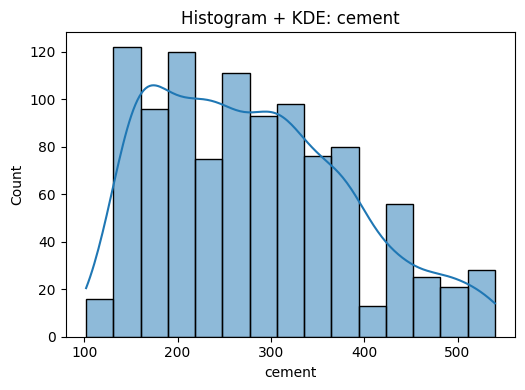

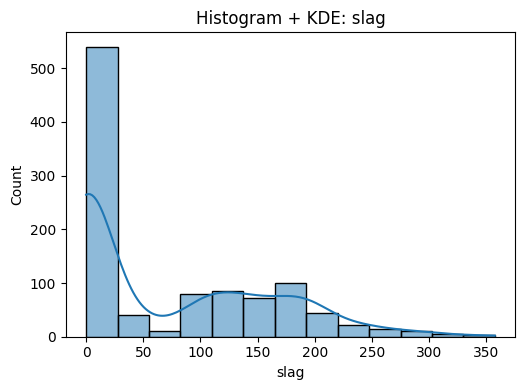

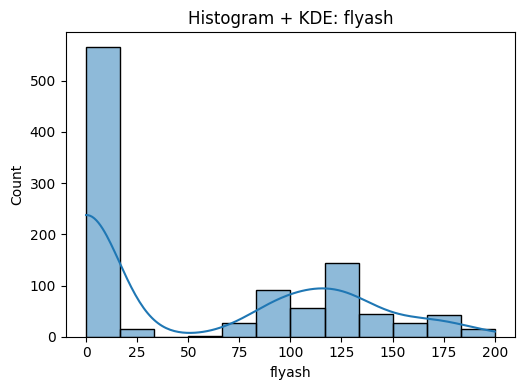

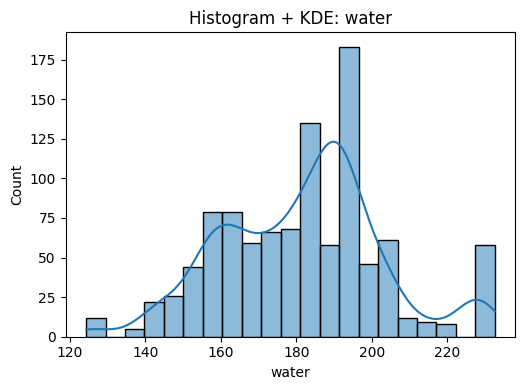

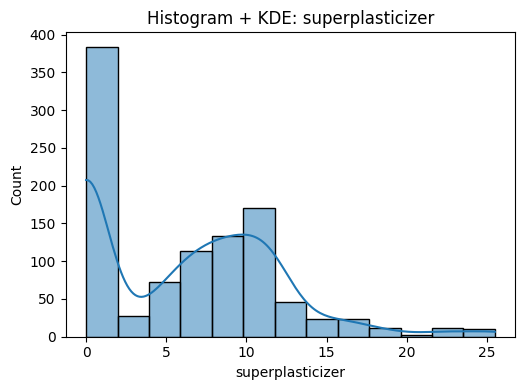

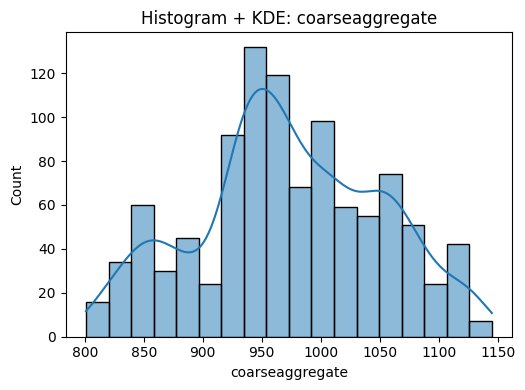

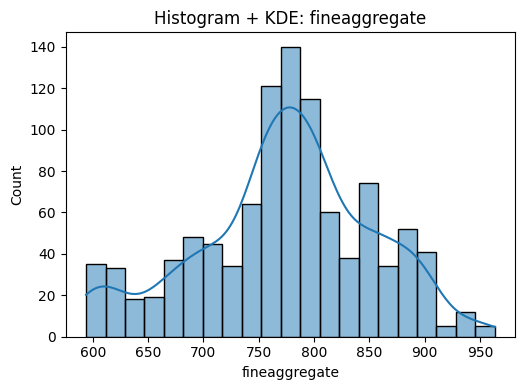

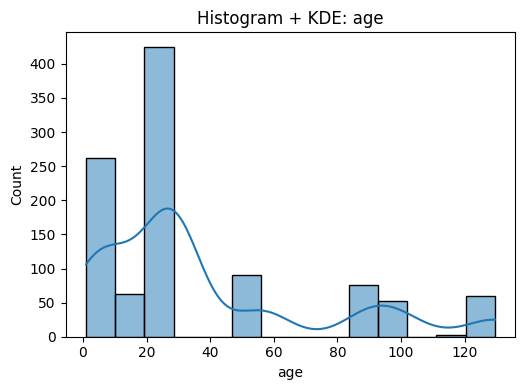

In [29]:
for col in Xcol:
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(dataset[col], kde=True)
    plt.title(f"Histogram + KDE: {col}")
      
    plt.tight_layout()
    plt.show()

##### Box Plot shows IQR, Min/Max, and outliers
##### start of the box is Q1 and end of the box is Q3, Line inside the box is median that is Q2 and there is no dots so not outliers

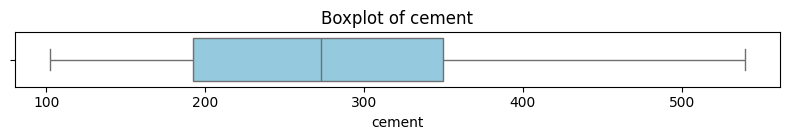

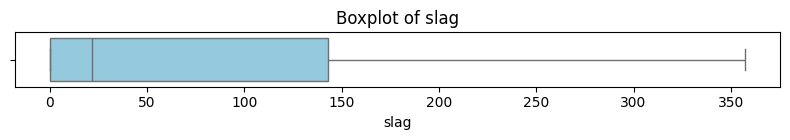

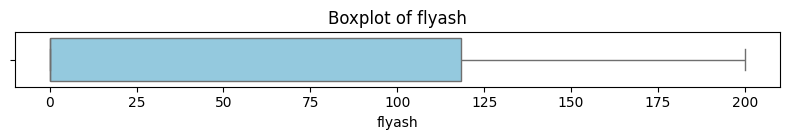

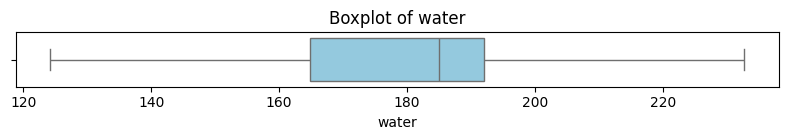

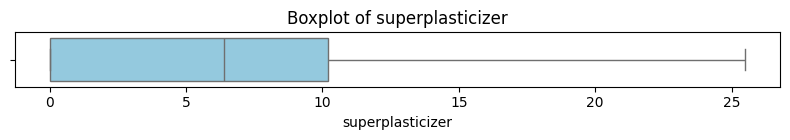

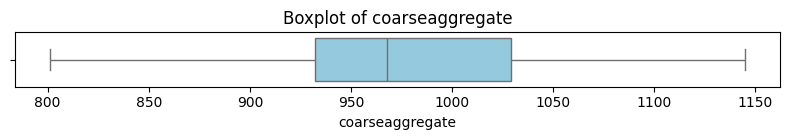

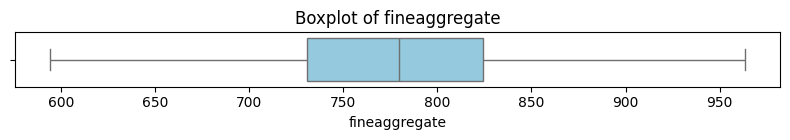

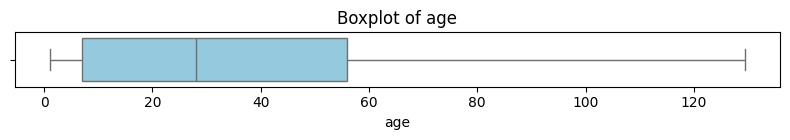

In [28]:
for col in Xcol:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=dataset[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

#### Scatter plot with outlier boundaries
#### Each blue dot represents the cement value from one data point
#### The x-axis is the index (row number), and the y-axis is the cement value
#### Upper red line anything above this might be a high outlier.
#### Lower red line anything below this might be a low outlier.

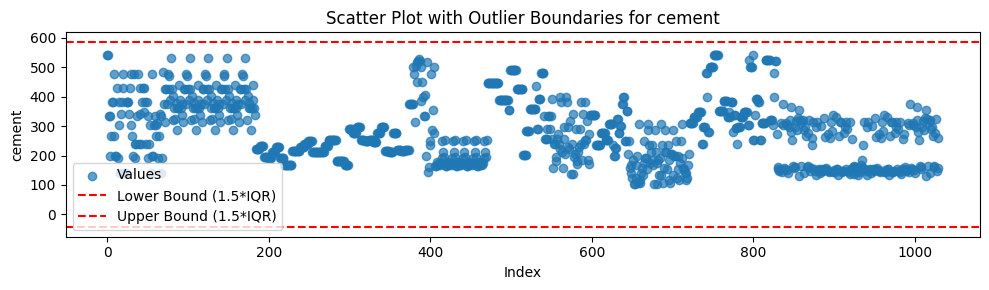

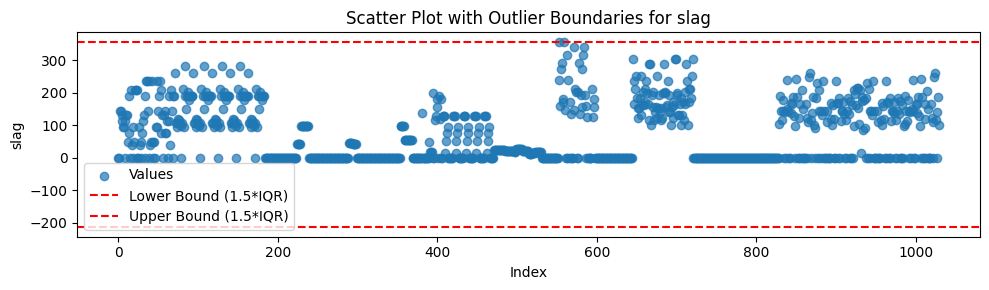

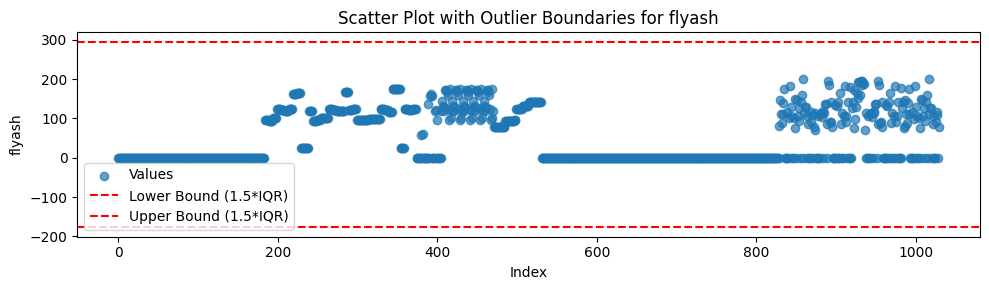

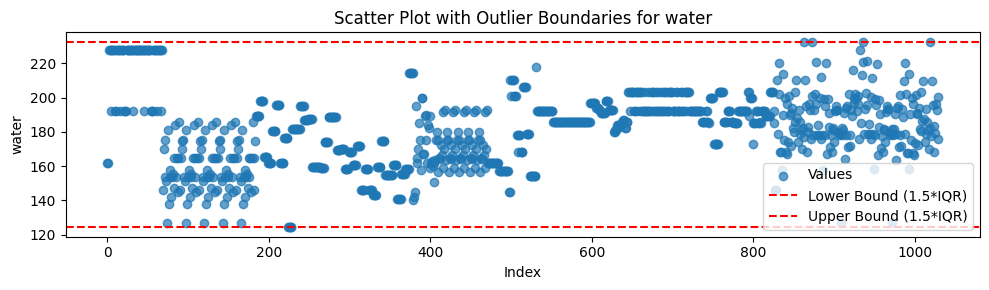

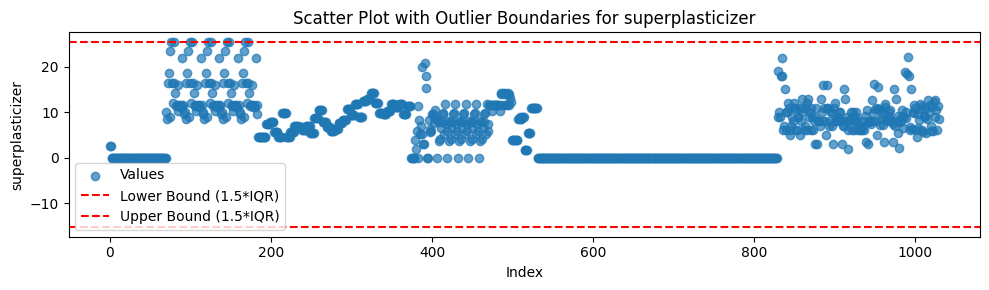

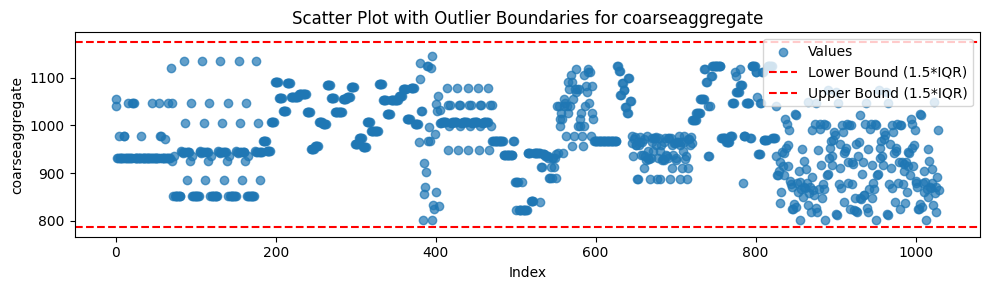

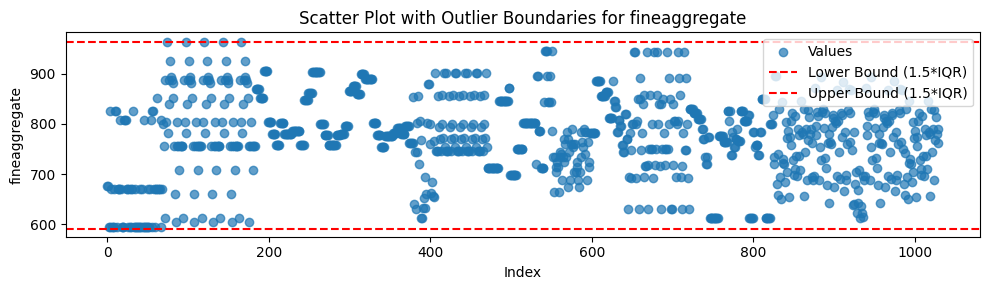

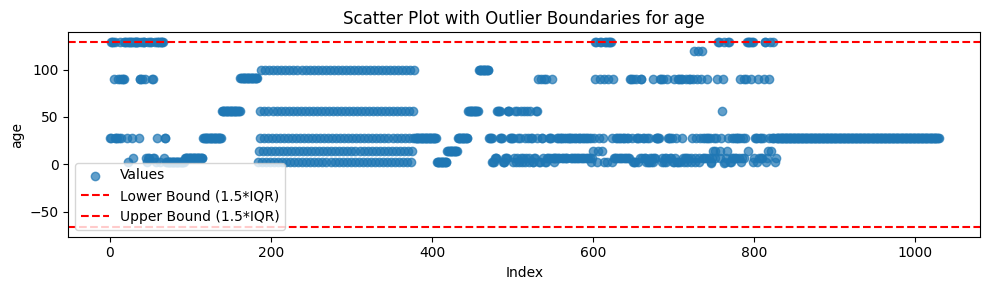

In [30]:
for col in Xcol:
    lesser_bound = descriptive.loc["Lesser", col]
    greater_bound = descriptive.loc["Greater", col]
    
    plt.figure(figsize=(10, 3))
    plt.scatter(dataset.index, dataset[col], label='Values', alpha=0.7)
    
    # Plot bounds
    plt.axhline(lesser_bound, color='red', linestyle='--', label='Lower Bound (1.5*IQR)')
    plt.axhline(greater_bound, color='red', linestyle='--', label='Upper Bound (1.5*IQR)')
    
    plt.title(f"Scatter Plot with Outlier Boundaries for {col}")
    plt.ylabel(col)
    plt.xlabel("Index")
    plt.legend()
    plt.tight_layout()
    plt.show()

##### Here we have plotted annoted box plot to know the clear visuvalization of each feature, you can give any column name in feature

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

def annotated_boxplot(feature, dataset):
    data = dataset[feature].dropna()

    # Calculate quartiles and stats
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    median = data.median()
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    min_val = data.min()
    max_val = data.max()

    plt.figure(figsize=(10, 2))
    sns.boxplot(x=data, color='skyblue')

    # Add annotations
    plt.text(median, 0.02, f'Median:\n{median:.2f}', ha='center', color='black')
    plt.text(q1, 0.15, f'Q1:\n{q1:.2f}', ha='center', color='blue')
    plt.text(q3, 0.15, f'Q3:\n{q3:.2f}', ha='center', color='blue')
    plt.text(min_val, -0.1, f'Min:\n{min_val:.2f}', ha='center', color='green')
    plt.text(max_val, -0.1, f'Max:\n{max_val:.2f}', ha='center', color='green')
    
    # Optional: add lines for IQR bounds
    plt.axvline(lower_whisker, color='red', linestyle='--', label='Lower Bound (1.5*IQR)')
    plt.axvline(upper_whisker, color='red', linestyle='--', label='Upper Bound (1.5*IQR)')

    plt.title(f'Annotated Boxplot of {feature}')
    plt.xlabel(feature)
    plt.legend()
    plt.tight_layout()
    plt.show()

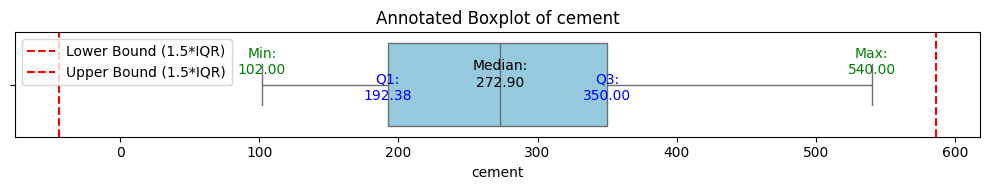

In [36]:
annotated_boxplot('cement', dataset)

###### Empricial cumulative density function
###### Here we can see how much density we have in each range of data.

In [51]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset["cement"])
ecdf(300)

0.5990291262135923

In [50]:
ecdf(400)

0.8679611650485437

In [54]:
def plot_ecdf(dataset, column):
    data = dataset[column].dropna().sort_values()
    n = len(data)
    y = np.arange(1, n+1) / n  # proportion
    plt.figure(figsize=(8, 5))
    plt.plot(data, y, marker='.', linestyle='none', color='blue')
    plt.xlabel(column)
    plt.ylabel('ECDF')
    plt.title(f'Empirical Cumulative Distribution Function for {column}')
    plt.grid(True)
    plt.show()

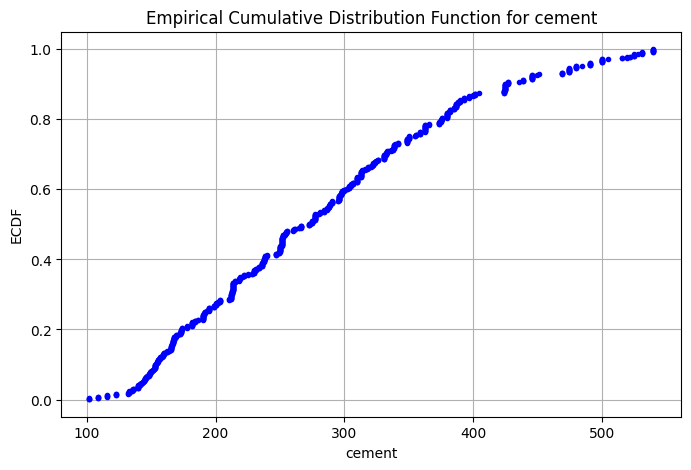

In [55]:
plot_ecdf(dataset, 'cement')

# most value is steep slope have more concentration and slow ramp lon tail is data skewed

### Standard Normal Distribution

In [78]:
def stdGraph(dataset):
    
    # Calculate mean and standard deviation
    mean = dataset.mean()
    std = dataset.std()
    values=[i for i in dataset]
    # Calculate Z-scores for each value
    z_score=[((j-mean)/std) for j in values]
    # Plot the distribution of Z-scores
    sns.histplot(z_score, kde=True, color='skyblue')
    plt.xlabel("Z-Score")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    # Print average Z-score (should be close to 0)
    print(f"Average Z-Score: {sum(z_score) / len(z_score):.8f}")

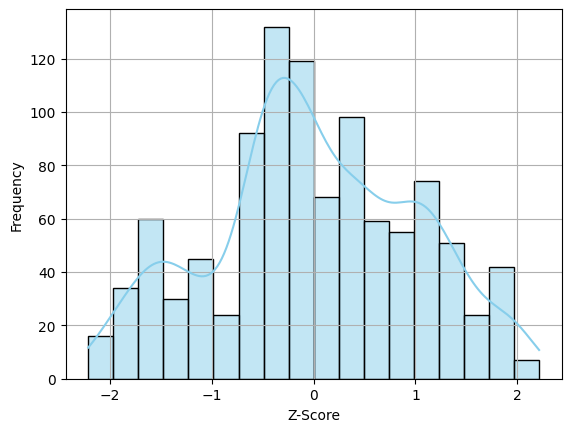

Average Z-Score: 0.00000000


In [80]:
stdGraph(dataset['coarseaggregate'])

# looks like a bell curve so your data is normally distributed
# A shift to the left or right means the data is skewed
# Tall and norrow most values are close to them
# Wide spread More variation in concrete strength.


### Probability Density Function

In [81]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    #giving dataset and kernel true and giving color for the same
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'red'},color='Yellow')
    # this is to represent the line color
    pyplot.axvline(startrange,color='blue')
    pyplot.axvline(endrange,color='blue')
    #generating sample dataset
    sample=dataset
    # calculating mean and std 
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean,sample_std))
    # defining the distribution
    dist=norm(sample_mean,sample_std)
    # creating a list with range and parameter will be taken form end user
    values=[value for value in range(startrange,endrange)]
    #created list is passed on default in built function to the distribution of the probabilities
    probabilities=[dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

C:\Users\Bagirathan\AppData\Local\Temp\ipykernel_5380\1469857213.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(dataset,kde=True,kde_kws={'color':'red'},color='Yellow')


Mean=972.919, Standard Deviation=77.754
The area between range(600,1000):0.633772466930104


0.633772466930104

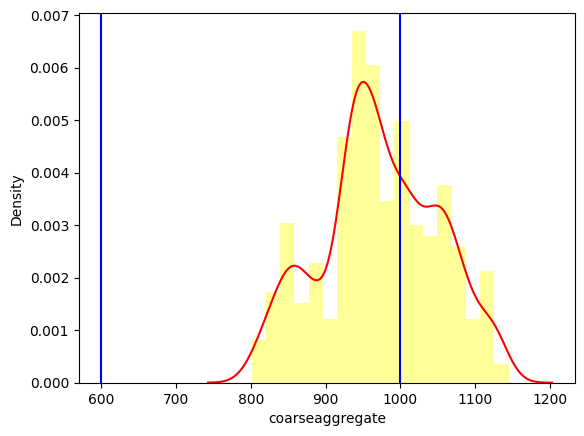

In [82]:
get_pdf_probability(dataset["coarseaggregate"],600,1000)

# Mean is 973
# SD is 77.75 means values vary 77 units around the mean
# 63.38% of the values fall from range 600 to 1000